Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_1320332/2964441593.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Pu2_1"].fillna(data["Pu2_1"].max(), inplace=True)


          Pu2_1
0  8.737540e-09
1  1.974240e-04
2  7.303470e-02
3  5.160900e-11
4  1.860480e-05
1.59821e-13
0.815537
0.012335501150902792
Skewness: 9.098862527486931
Kurtosis: 96.67760296505494
Distribution Type: Right Skewed Distribution


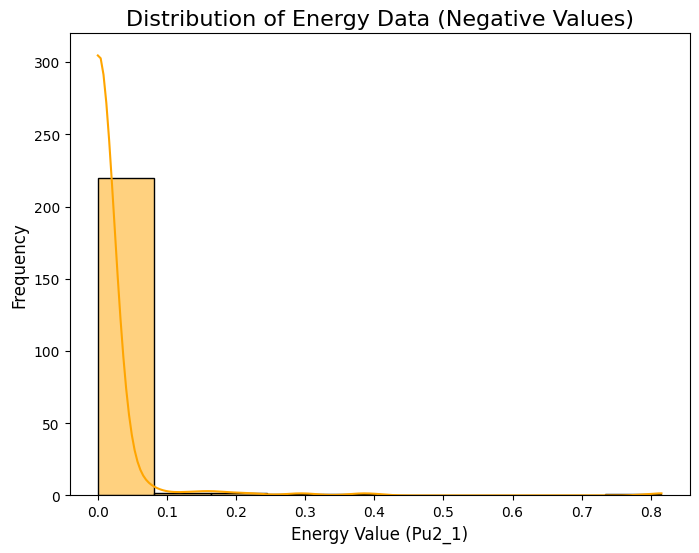

In [1]:
#Analysis of Energy Data
%pip install numpy
%pip install scikit-learn
%pip install numpy
%pip install seaborn
%pip install matplotlib
%pip install scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import skew, kurtosis
data = pd.read_csv('data.csv')
data["Pu2_1"].fillna(data["Pu2_1"].max(), inplace=True)
median = pd.DataFrame(data["Pu2_1"])
median.to_csv('data.csv', index=False)
print(data.head())
# Calculate min, max, and mean
median_values = np.median(data)
min_values = np.min(data)
max_values = np.max(data)
mean_values = np.mean(data)

# Print the values
print(min_values)
print(max_values)
print(mean_values)

# Write the values to a CSV file
summary_stats = pd.DataFrame({
    'Statistic': ['Min', 'Max', 'Mean', 'Median'],
    'Pu2_1': [min_values, max_values, mean_values, median_values]
})
summary_stats.to_csv('summary_statistics.csv', index=False)
# Compute Skewness and Kurtosis
data_skewness = skew(data['Pu2_1'])
data_kurtosis = kurtosis(data['Pu2_1'])
print(f"Skewness: {data_skewness}")
print(f"Kurtosis: {data_kurtosis}")

# Write skewness and kurtosis to a CSV file
distribution_stats = pd.DataFrame({
    'Statistic': ['Skewness', 'Kurtosis'],
    'Value': [data_skewness, data_kurtosis]
})
distribution_stats.to_csv('distribution_statistics.csv', index=False)
# Determine the type of distribution based on skewness and kurtosis
if abs(data_skewness) < 0.5 and abs(data_kurtosis - 3) < 1:
    distribution_type = 'Normal Distribution'
elif data_skewness > 0:
    distribution_type = 'Right Skewed Distribution'
elif data_skewness < 0:
    distribution_type = 'Left Skewed Distribution'
elif abs(data_kurtosis - 3) > 1:
    distribution_type = 'Leptokurtic Distribution (Heavy Tails)'
else:
    distribution_type = 'Platykurtic Distribution (Light Tails)'

print(f"Distribution Type: {distribution_type}")
# Plot the distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Pu2_1'], kde=True, color='orange', bins=10)

# Set plot labels and title
plt.title('Distribution of Energy Data (Negative Values)', fontsize=16)
plt.xlabel('Energy Value (Pu2_1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Save the plot as a PNG file
plt.savefig('Pu2_1.png')
# Show the plot
plt.show()



Transformed Data Summary:
count    227.000000
mean     -11.415934
std        5.487638
min      -29.464722
25%      -15.063711
50%      -10.739162
75%       -7.493622
max       -0.203908
Name: Pu2_1_log, dtype: float64


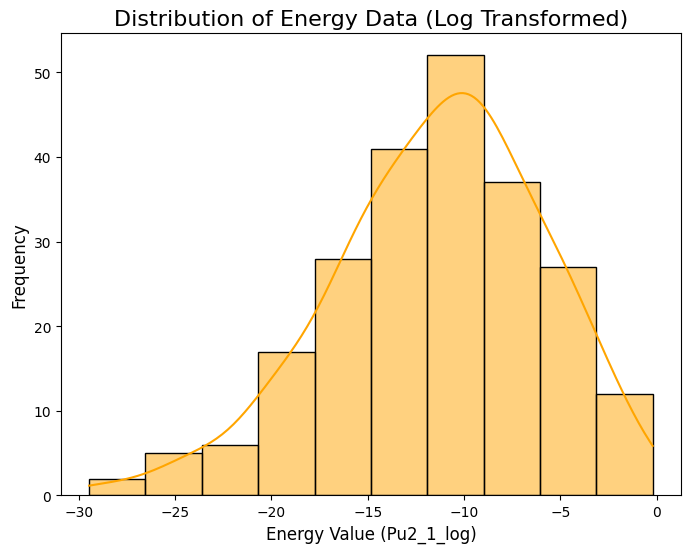

Skewness (Transformed Data): -0.4836271243815145
Kurtosis (Transformed Data): 0.12482952617037446
Distribution Type (Transformed Data): Left Skewed Distribution


In [2]:
# Log transformation of the data

# Define the column name
column_name = 'Pu2_1'

# Apply log transformation
data[column_name + "_log"] = np.log(data[column_name])

# Save the transformed data
data.to_csv("data_transformed.csv", index=False)

# Print basic statistics
print("Transformed Data Summary:")
print(data[column_name + "_log"].describe())

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.histplot(data[column_name + '_log'], kde=True, color='orange', bins=10)

# Set plot labels and title
plt.title('Distribution of Energy Data (Log Transformed)', fontsize=16)
plt.xlabel('Energy Value (Pu2_1_log)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Save the plot as a PNG file
plt.savefig('Pu2_1_transformed.png')
# Show the plot
plt.show()

# Compute Skewness and Kurtosis for transformed data
data_transformed_skewness = skew(data[column_name + '_log'])
data_transformed_kurtosis = kurtosis(data[column_name + '_log'])

# Write skewness and kurtosis to a CSV file
distribution_stats_transformed = pd.DataFrame({
    'Statistic': ['Skewness', 'Kurtosis'],
    'Value': [data_transformed_skewness, data_transformed_kurtosis]
})
distribution_stats_transformed.to_csv('distribution_statistics_transformed.csv', index=False)

# Determine the type of distribution based on skewness and kurtosis
if abs(data_transformed_skewness) < 0.5 and abs(data_transformed_kurtosis - 3) < 1:
    distribution_type_transformed = 'Normal Distribution'
elif data_transformed_skewness > 0:
    distribution_type_transformed = 'Right Skewed Distribution'
elif data_transformed_skewness < 0:
    distribution_type_transformed = 'Left Skewed Distribution'
elif abs(data_transformed_kurtosis - 3) > 1:
    distribution_type_transformed = 'Leptokurtic Distribution (Heavy Tails)'
else:
    distribution_type_transformed = 'Platykurtic Distribution (Light Tails)'

print(f"Skewness (Transformed Data): {data_transformed_skewness}")
print(f"Kurtosis (Transformed Data): {data_transformed_kurtosis}")
print(f"Distribution Type (Transformed Data): {distribution_type_transformed}")


/home/reyhaneh/miniconda3/envs/__arabic_reshaper@3.0.0/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (227). n_quantiles is set to n_samples.
  warnings.warn(


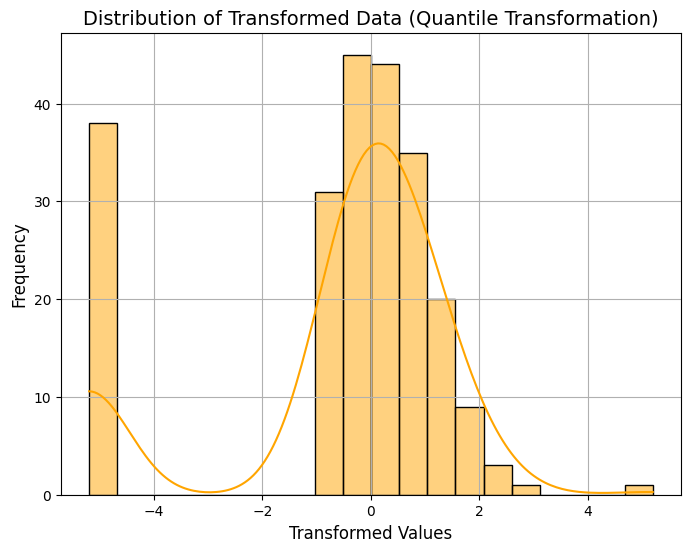

Skewness (After Transformation): -1.239774564771331
Kurtosis (After Transformation): 0.5791299315728895
Distribution Type: Left Skewed


In [3]:
#Quantile Transformation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import skew, kurtosis

# Load the data
data = pd.read_csv("data.csv")

# Define the column name
column_name = "Pu2_1"  # Change this to match your column name

# Initialize QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)

# Apply transformation
data_transformed = quantile_transformer.fit_transform(data[[column_name]])

# Convert transformed data back to DataFrame
data_transformed = pd.DataFrame(data_transformed, columns=[column_name + "_Qtransformed"])

# Save transformed data
data_transformed.to_csv("data_Qtransformed.csv", index=False)

# Plot transformed data
plt.figure(figsize=(8, 6))
sns.histplot(data_transformed[column_name + "_Qtransformed"], kde=True, color='ORANGE', bins=20)
plt.title('Distribution of Transformed Data (Quantile Transformation)', fontsize=14)
plt.xlabel('Transformed Values', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid()
plt.savefig("Pu2_1_Qtransformed.png")
plt.show()

# Compute skewness and kurtosis
skewness = skew(data_transformed[column_name + "_Qtransformed"])
kurt = kurtosis(data_transformed[column_name + "_Qtransformed"])

# Save distribution statistics
distribution_stats = pd.DataFrame({
    "Statistic": ["Skewness", "Kurtosis"],
    "Value": [skewness, kurt]
})
distribution_stats.to_csv("distribution_statistics_Qtransformed.csv", index=False)

# Print results
print(f"Skewness (After Transformation): {skewness}")
print(f"Kurtosis (After Transformation): {kurt}")

# Determine the type of distribution
if abs(skewness) < 0.5 and abs(kurt - 3) < 1:
    distribution_type = "Normal Distribution"
elif skewness > 0:
    distribution_type = "Right Skewed"
elif skewness < 0:
    distribution_type = "Left Skewed"
elif abs(kurt - 3) > 1:
    distribution_type = "Leptokurtic (Heavy Tails)"
else:
    distribution_type = "Platykurtic (Light Tails)"

print(f"Distribution Type: {distribution_type}")


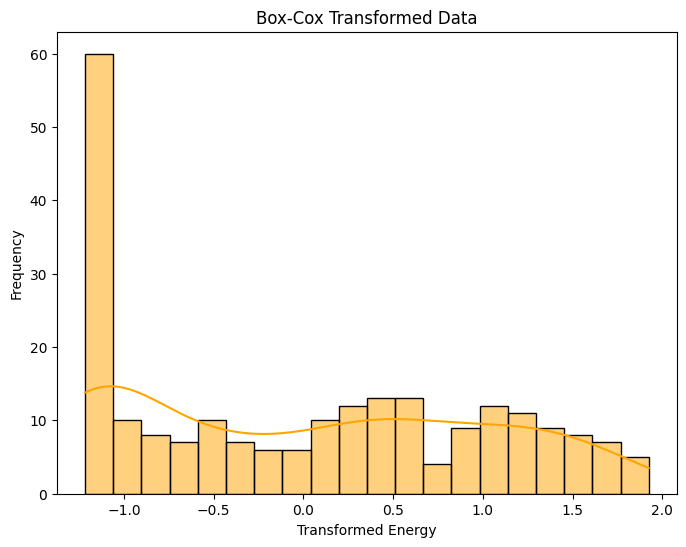

Optimal Lambda (Box-Cox): [-0.12618417]
Skewness after Box-Cox: 0.21195286625483906
Kurtosis after Box-Cox: -1.346165667431693
Distribution Type (Box-Cox): Right Skewed Distribution


In [4]:
# Box-Cox transformation without shifting the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import PowerTransformer

# Load data
data = pd.read_csv("data.csv")

# Define column name
column_name = 'Pu2_1'  # Change this to match your column name

# Apply Box-Cox Transformation
scaler = PowerTransformer(method='box-cox')
data[column_name + "_BoxCox"] = scaler.fit_transform(data[[column_name]] + 1e-6)

# Save transformed data
data.to_csv("data_BoxCox_transformed.csv", index=False)

# Plot Distribution of Transformed Data
plt.figure(figsize=(8, 6))
sns.histplot(data[column_name + "_BoxCox"], kde=True, color='orange', bins=20)
plt.title('Box-Cox Transformed Data')
plt.xlabel('Transformed Energy')
plt.ylabel('Frequency')
plt.savefig('BoxCox_transformed.png')
plt.show()

# Compute Skewness and Kurtosis
skewness = skew(data[column_name + "_BoxCox"])
kurt = kurtosis(data[column_name + "_BoxCox"])

# Save statistics
stats_df = pd.DataFrame({'Statistic': ['Skewness', 'Kurtosis'], 'Value': [skewness, kurt]})
stats_df.to_csv("BoxCox_distribution_stats.csv", index=False)

# Print summary
print(f"Optimal Lambda (Box-Cox): {scaler.lambdas_}")
print(f"Skewness after Box-Cox: {skewness}")
print(f"Kurtosis after Box-Cox: {kurt}")

# Determine the type of distribution based on skewness and kurtosis
if abs(skewness) < 0.5 and abs(kurt - 3) < 1:
    distribution_type_BoxCox = 'Normal Distribution'
elif skewness > 0:
    distribution_type_BoxCox = 'Right Skewed Distribution'
elif skewness < 0:
    distribution_type_BoxCox = 'Left Skewed Distribution'
elif abs(kurt - 3) > 1:
    distribution_type_BoxCox = 'Leptokurtic Distribution (Heavy Tails)'
else:
    distribution_type_BoxCox = 'Platykurtic Distribution (Light Tails)'

print(f"Distribution Type (Box-Cox): {distribution_type_BoxCox}")


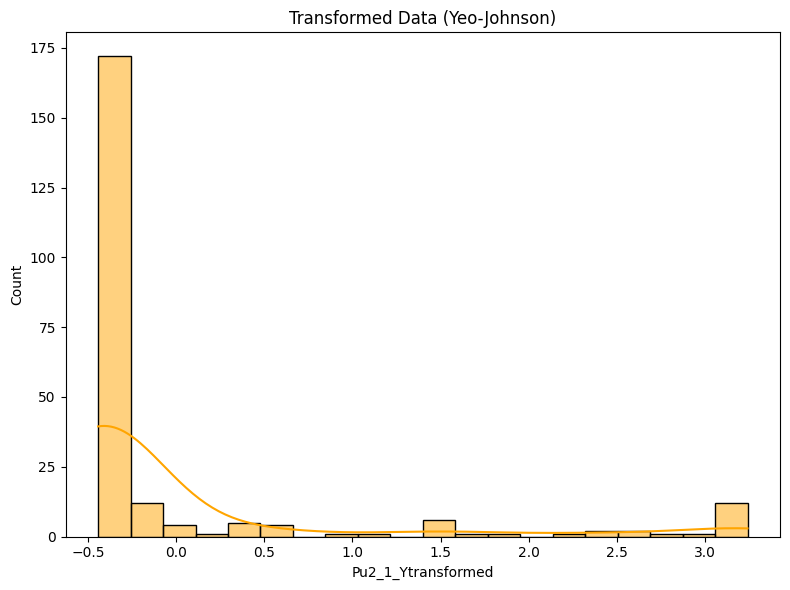


Transformed Data Statistics:
Skewness: 2.407405272974006
Kurtosis: 4.481780767804616
Skewness (Transformed Data): 2.407405272974006
Kurtosis (Transformed Data): 4.481780767804616
Distribution Type (Transformed Data): Right Skewed Distribution
Optimal Lambda: [-75.80927313]


In [5]:
# Apply Yeo-Johnson transformation
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
data_transformed = scaler.fit_transform(data[[column_name]])

# Convert the transformed data back to a DataFrame
data_transformed = pd.DataFrame(data_transformed, columns=[column_name + '_Ytransformed'])
data_transformed.to_csv('Ytransformed_data.csv', index=False)

# Plot the transformed data
plt.figure(figsize=(8, 6))

# Plot transformed data
sns.histplot(data_transformed[column_name + '_Ytransformed'], kde=True, color='orange', bins=20)
plt.title('Transformed Data (Yeo-Johnson)')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('Pu2_1_Ytransformed.png')

# Show the plot
plt.show()


print("\nTransformed Data Statistics:")
print(f"Skewness: {data_transformed[column_name + '_Ytransformed'].skew()}")
print(f"Kurtosis: {data_transformed[column_name + '_Ytransformed'].kurtosis()}")

# Write skewness and kurtosis to a CSV file
distribution_stats_Ytransformed = pd.DataFrame({
    'Statistic': ['Skewness', 'Kurtosis'],
    'Value': [data_transformed[column_name + '_Ytransformed'].skew(), data_transformed[column_name + '_Ytransformed'].kurtosis()]
})
distribution_stats_Ytransformed.to_csv('distribution_statistics_Ytransformed.csv', index=False)

# Determine the type of distribution based on skewness and kurtosis
if abs(data_transformed[column_name + '_Ytransformed'].skew()) < 0.5 and abs(data_transformed[column_name + '_Ytransformed'].kurtosis() - 3) < 1:
    distribution_type_transformed = 'Normal Distribution'
elif data_transformed[column_name + '_Ytransformed'].skew() > 0:
    distribution_type_transformed = 'Right Skewed Distribution'
elif data_transformed[column_name + '_Ytransformed'].skew() < 0:
    distribution_type_transformed = 'Left Skewed Distribution'
elif abs(data_transformed[column_name + '_Ytransformed'].kurtosis() - 3) > 1:
    distribution_type_transformed = 'Leptokurtic Distribution (Heavy Tails)'
else:
    distribution_type_transformed = 'Platykurtic Distribution (Light Tails)'

print(f"Skewness (Transformed Data): {data_transformed[column_name + '_Ytransformed'].skew()}")
print(f"Kurtosis (Transformed Data): {data_transformed[column_name + '_Ytransformed'].kurtosis()}")
print(f"Distribution Type (Transformed Data): {distribution_type_transformed}")

print(f"Optimal Lambda: {scaler.lambdas_}")
